# Pickling a Model

- For productionalization & use outside your notebook!

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import Pipeline

from sklearn.metrics import plot_confusion_matrix, classification_report

df = pd.read_csv('data_banknote_authentication.csv')
df.columns = ["Variance","Skewness", "Kurtosis", "Entropy", "Class"]

### 1. Pick your final model

In [2]:
X = df.drop('Class', axis=1)
y = df['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20) 

In [3]:
pipeline = Pipeline([('ss', StandardScaler()), 
                    ('RF', RandomForestClassifier(random_state=123))])

In [4]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('ss', StandardScaler()),
                ('RF', RandomForestClassifier(random_state=123))])

In [5]:
train_preds = pipeline.predict(X_train)
test_preds = pipeline.predict(X_test)

In [6]:
print(classification_report(y_train, train_preds))
print(classification_report(y_test, test_preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       618
           1       1.00      1.00      1.00       478

    accuracy                           1.00      1096
   macro avg       1.00      1.00      1.00      1096
weighted avg       1.00      1.00      1.00      1096

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       143
           1       1.00      0.98      0.99       132

    accuracy                           0.99       275
   macro avg       0.99      0.99      0.99       275
weighted avg       0.99      0.99      0.99       275



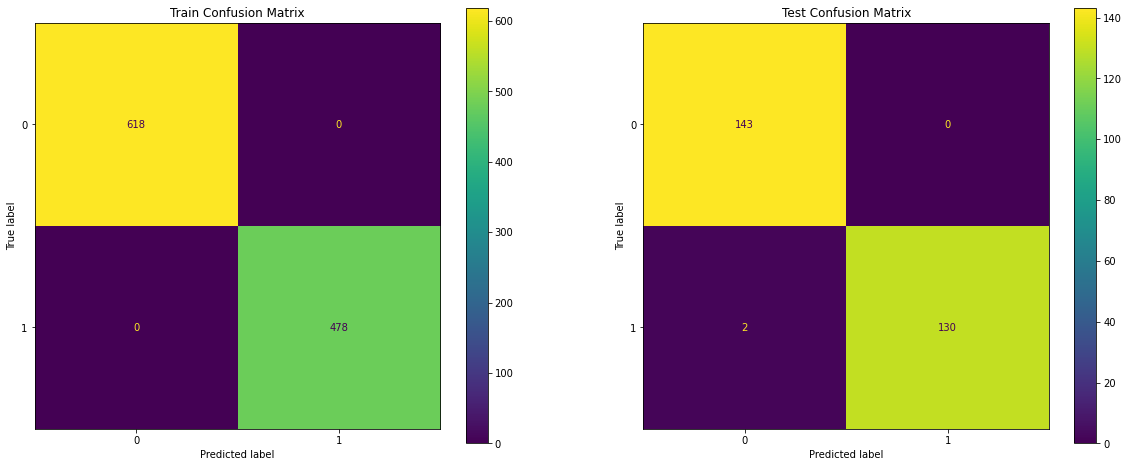

In [7]:
fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(20, 8))
plot_confusion_matrix(pipeline, X_train, y_train, ax=ax0)
plot_confusion_matrix(pipeline, X_test, y_test, ax=ax1)
ax0.title.set_text('Train Confusion Matrix')
ax1.title.set_text('Test Confusion Matrix')

In [8]:
import pickle

# make sure your model has already been fit before you pickle it!!

pickle.dump(pipeline, open("model.pkl", "wb"))

### 2. How to make predictions?

Dataset: https://archive.ics.uci.edu/ml/datasets/banknote+authentication

In [9]:
X_train.describe()

,Variance,Skewness,Kurtosis,Entropy
count,1096.000000,1096.000000,1096.000000,1096.000000
mean,0.453809,1.919390,1.415208,-1.199459
std,2.844409,5.895593,4.299845,2.099685
min,-7.042100,-13.677900,-5.286100,-7.785300
25%,-1.759150,-1.866000,-1.547525,-2.344300
50%,0.535025,2.292750,0.629915,-0.580830
75%,2.852150,6.837925,3.318275,0.383818
max,6.091900,12.730200,17.677200,2.449500


In [10]:
pipeline.predict([[0.45, 1.99, 1.23, 0]])

array([0])

In [11]:
# perhaps create a prediction function

def make_prediction(model, var, skew, kurt, entropy):
    
    pred = model.predict([[var, skew, kurt, entropy]])
    
    if pred[0] == 0:
        return 'Authentic'
    else:
        return 'Forged'

In [12]:
make_prediction(pipeline, 0, 0, 0, 0)

'Forged'

### 3. Put it in a script!

Reminder this is not necessary for the project, but good to know especially for the capstone!

Check out `banknote_pred.py`

In [13]:
# code to open a pickle

model = pickle.load(open("model.pkl", "rb"))

In [14]:
make_prediction(model, 0, 0, 0, 0)

'Forged'